## Training on Stars

We can train our autoencoder on all sorts of data. We will now use a subset of the Caltech 101 dataset. This dataset contains 101 image classes. The version we will use is is the 16 by 16 silluettes. We chose this dataset because it is significantly smaller than the MNIST dataset, but still have interesting enough variation for our autoencoder to pick up. 

In [13]:
import pickle, gzip
import matplotlib.pyplot as plt 
import numpy as np
import sys
import scipy.io
%matplotlib inline
np.random.seed(0)

In [14]:
from vae import VAE

In [15]:
sil = scipy.io.loadmat('../resources/data/caltech101_16.mat')
silX = sil['X']
silY = sil['Y']
silX_train = silX[np.where(sil['Y'] == 87)[1],:][0:80,:]
silX_test  = silX[np.where(sil['Y'] == 87)[1],:][81:,:]

Setting up the autoencoder:

In [23]:
params = {
    'alpha' : 0.02,
    'iter' : 50,
    'activation': 'sigmoid',
    'loss': 'squared_error',
    'batch_size': 0
}

example = VAE([[256, 100], [100, 256]], 2, params)

### Training

Let's take a look at the training data. We filter to just the starfish class. Even for a simple black and white 16 by 16 image, there's a lot of variability. The image can be rotated or truncated. There can be more than one starfish in the image. 

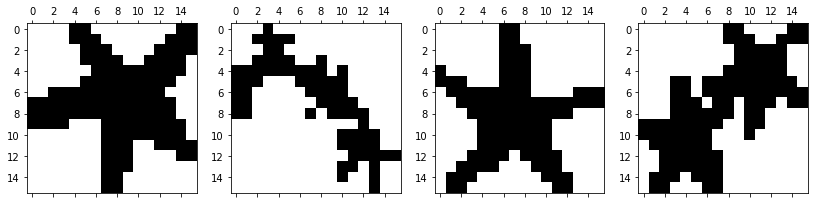

In [24]:
fig, ax = plt.subplots(1,4, figsize = (14, 10))
for i in range(4):
    ax[i].matshow(silX_train[i].reshape((16,16)), cmap='gray', clim=(0,1))
pass

In [25]:
example.learn(silX_train)

The prediction function of the variational autoencoder results in some blurry images, with some qualities of a starfish. The output of the first and the third picture seem to have five protuberances, which vaguely resemble arms. The seconds image seems to be a failing of the autoencoder, the results are a lot blurrier than expected.

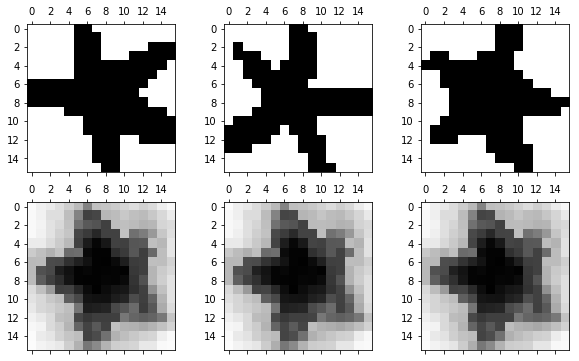

In [26]:
fig, ax = plt.subplots(2,3, figsize = (10, 6))

for i in range(3):
    in_star = silX_test[i][None,:]
    out_star = example.encode_decode(in_star)
    ax[0,i].matshow(in_star.reshape((16,16)),  cmap='gray', clim=(0,1))
    ax[1,i].matshow(out_star.reshape((16,16)), cmap='gray', clim=(0,1))
pass

### References

1. [Caltech 101](http://www.vision.caltech.edu/Image_Datasets/Caltech101/)